Instalamos la biblioteca scikit-learn de Python para poder realizar el clustering de los datos utilizando las funciones de k-means de dicha librería

In [1]:
!pip install scikit-learn

Clonamos el repositorio donde se encuentran los datos con los que vamos a trabajar

In [2]:
!git clone https://github.com/jesussantiyan/TFG.git

Cloning into 'TFG'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 39 (delta 11), reused 20 (delta 5), pack-reused 0
Unpacking objects: 100% (39/39), 26.83 MiB | 5.48 MiB/s, done.


Realizamos las importaciones necesarias para poder realizar el trabajo

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

Leemos el archivo .csv donde se encuentran los datos a usar y formamos el dataset correspondiente

In [4]:
df_puntos = pd.read_csv('/content/TFG/NubesDePuntos_ORM1159651383.csv', sep=',', index_col='Cnt')
df_puntos.head()

Fecha          PC1        PC2
Cnt                                              
LGZ0018937198  2019-11-15 -1605.028057  85.087046
LGZ0018937198  2019-11-16 -1665.493786  87.336322
LGZ0018937198  2019-11-17 -1665.493786  87.336322
LGZ0018937198  2019-11-18 -1665.493786  87.336322
LGZ0018937198  2019-11-19 -1665.493786  87.336322

In [5]:
df_puntos['Fecha'] = pd.to_datetime(df_puntos['Fecha'])
df_puntos['Estaciones'] = df_puntos['Fecha'].dt.month.map({
    1: 'Invierno',
    2: 'Invierno',
    3: 'Primavera',
    4: 'Primavera',
    5: 'Primavera',
    6: 'Verano',
    7: 'Verano',
    8: 'Verano',
    9: 'Otoño',
    10: 'Otoño',
    11: 'Otoño',
    12: 'Invierno'
})
df_puntos

Fecha           PC1         PC2 Estaciones
Cnt                                                          
LGZ0018937198 2019-11-15  -1605.028057   85.087046      Otoño
LGZ0018937198 2019-11-16  -1665.493786   87.336322      Otoño
LGZ0018937198 2019-11-17  -1665.493786   87.336322      Otoño
LGZ0018937198 2019-11-18  -1665.493786   87.336322      Otoño
LGZ0018937198 2019-11-19  -1665.493786   87.336322      Otoño
...                  ...           ...         ...        ...
ZIV0036308462 2023-03-11  12768.057275  187.591773  Primavera
ZIV0036308462 2023-03-12  13845.863837   42.608677  Primavera
ZIV0036308462 2023-03-13  10931.829203  464.436920  Primavera
ZIV0036308462 2023-03-14  11755.919384  153.848341  Primavera
ZIV0036308462 2023-03-15    456.565210  -16.983857  Primavera

[125410 rows x 4 columns]

Seleccionamos las columnas relevantes para el algortimo

In [6]:
X_pca = df_puntos[['PC1', 'PC2']]

Incializamos los valores con los que vamos a trabajr para realizar el K-means

In [7]:
# parameters
init = 'random'
iterations = 10
max_iter = 300
tol = 1e-04
random_state = 0

Realizamos un análisis de agrupamiento utilizando el algoritmo K-means en X_pca. A medida que iteramos sobre un rango de 2 a 10 (ambos inclusive), ajustamos el modelo K-means con diferentes cantidades de clústeres y guardamos dos medidas de evaluación para cada iteración.

Declaramos una lista donde se almacenan las distorsiones calculadas para cada valor de n_clusters. La distorsión es una medida de cuánto se "distorsiona" el conjunto de datos para ajustarse a los centroides de los clústeres. En general, se busca minimizar la distorsión para obtener clústeres más compactos y cohesionados.

Declaramos otra lista donde se guardan los valores de silueta calculados para cada valor de n_clusters. El valor de silueta es una medida de qué tan bien están separados los clústeres. Un valor de silueta más alto indica una mejor separación entre los clústeres.

En cada iteración, se ajusta el modelo K-means con los parámetros proporcionados anteriormente y se obtienen las etiquetas de clústeres (labels) asignadas a cada muestra de X_pca. Luego, se calcula la distorsión y el valor de silueta correspondientes y se agregan a las listas respectivas.

In [ ]:
distortions = []
silhouettes = []

for i in range(2, 11):
    km = KMeans(n_clusters = i, init = init, n_init = iterations ,max_iter= max_iter, tol = tol,random_state = random_state)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

Creamos un gráfico con dos líneas, una para distortions en color rojo y otra para silhouettes en color azul, en función de los valores de x. La variable x es una lista que contiene los números del 2 al 10.

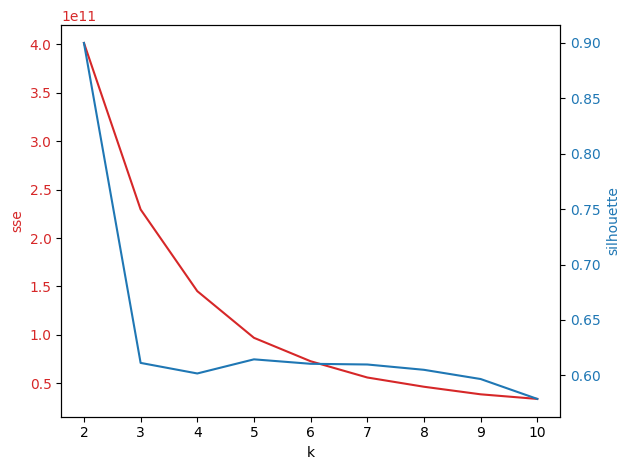

In [ ]:
x = [i for i in range(2,11)]
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k')
ax1.set_ylabel('sse', color=color)
ax1.plot(x, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(x, silhouettes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Realizamos el clustering de datos utilizando el algoritmo K-means, especificando el número el cluster en 5 (n_cluster) gracias a lo obtenido en la gráfica anterior. Indicamos el resto de parámetros con los mismos valores que ya se habían propuesto anteriormente:

init = init: Especifica el método de inicialización de los centroides de los clústeres. Puede tener diferentes valores, como "random" para inicialización aleatoria o "k-means++" para una inicialización más inteligente basada en la distancia de los puntos.

n_init = iterations: Indica el número de veces que se ejecutará el algoritmo K-means con diferentes centroides iniciales. El algoritmo se ejecuta varias veces y se selecciona el resultado con la menor suma de errores cuadráticos para los puntos asignados a los clústeres.

max_iter = max_iter: Establece el número máximo de iteraciones permitidas en cada ejecución del algoritmo K-means. Si el algoritmo no converge (es decir, los centroides no cambian significativamente) dentro de estas iteraciones, se detendrá.

tol = tol: Establece un umbral de tolerancia para la convergencia del algoritmo K-means. Si la diferencia entre las posiciones anteriores y actuales de los centroides es menor que el valor de tol, se considera que el algoritmo ha convergido y se detendrá.

random_state = random_state: Establece una semilla para la generación de números aleatorios en el algoritmo K-means. Al fijar una semilla, se garantiza que los resultados sean reproducibles, es decir, cada vez que se ejecute el código con la misma semilla, se obtendrán los mismos resultados.

Después de crear el objeto km con los parámetros especificados, se realiza el ajuste y la predicción utilizando X_pca como datos de entrada.

In [8]:
km = KMeans(n_clusters = 5, init = init, n_init = iterations ,
            max_iter= max_iter, tol = tol, random_state = random_state)

y_km = km.fit_predict(X_pca)

Imprimimos el coeficiente de silueta y la distorsión, para evaluar la calidad de los clústeres en el análisis.

In [ ]:
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, y_km))

print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.615
Distortion: 96988149031.75


Generamos un gráfico de dispersión donde los puntos se colocan en función de las dos primeras dimensiones de X_pca y se colorean de acuerdo con las etiquetas de clúster proporcionadas por km.labels_. De esta manera podemos visualizar la distribución de los puntos y la separación entre los diferentes clústeres.

In [9]:
fig = px.scatter(x=X_pca["PC1"], y= X_pca["PC2"], color = km.labels_)

fig.show()

In [10]:
df_puntos['kmeans_group'] = km.labels_
df_puntos

Fecha           PC1         PC2 Estaciones  kmeans_group
Cnt                                                                        
LGZ0018937198 2019-11-15  -1605.028057   85.087046      Otoño             0
LGZ0018937198 2019-11-16  -1665.493786   87.336322      Otoño             0
LGZ0018937198 2019-11-17  -1665.493786   87.336322      Otoño             0
LGZ0018937198 2019-11-18  -1665.493786   87.336322      Otoño             0
LGZ0018937198 2019-11-19  -1665.493786   87.336322      Otoño             0
...                  ...           ...         ...        ...           ...
ZIV0036308462 2023-03-11  12768.057275  187.591773  Primavera             4
ZIV0036308462 2023-03-12  13845.863837   42.608677  Primavera             4
ZIV0036308462 2023-03-13  10931.829203  464.436920  Primavera             4
ZIV0036308462 2023-03-14  11755.919384  153.848341  Primavera             4
ZIV0036308462 2023-03-15    456.565210  -16.983857  Primavera             1

[125410 rows x 5 columns]

In [ ]:
res = df_puntos[['Estaciones', 'kmeans_group']].groupby('kmeans_group').describe()
res

Estaciones                        
                  count unique       top   freq
kmeans_group                                   
0                 68727      4     Otoño  18194
1                 46600      4  Invierno  13270
2                  7617      4  Invierno   2959
3                   792      4  Invierno    443
4                  1674      4  Invierno    549

In [ ]:
res.to_csv('res.xlsx')

Como se distribuyen cada estación en cada cluster

<Axes: xlabel='kmeans_group'>

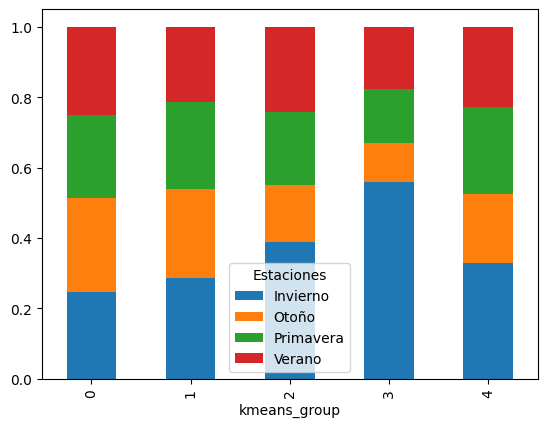

In [ ]:
res = df_puntos.groupby('kmeans_group')['Estaciones'].value_counts(normalize=True)
res.unstack().plot(kind='bar', stacked=True, legend=True)

Frecuencia de aparición de cada estación en cada cluster

<Axes: xlabel='kmeans_group'>

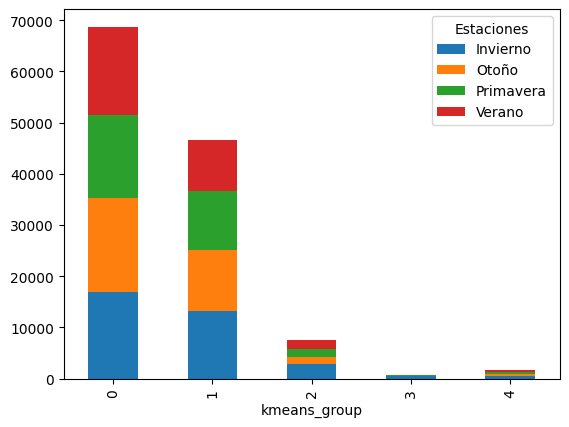

In [ ]:
res = df_puntos.groupby('kmeans_group')['Estaciones'].value_counts()
res.unstack().plot(kind='bar', stacked=True, legend=True)


In [ ]:
res

kmeans_group  Estaciones
0             Otoño         18194
              Verano        17225
              Invierno      17019
              Primavera     16289
1             Invierno      13270
              Otoño         11828
              Primavera     11511
              Verano         9991
2             Invierno       2959
              Verano         1839
              Primavera      1588
              Otoño          1231
3             Invierno        443
              Verano          140
              Primavera       122
              Otoño            87
4             Invierno        549
              Primavera       412
              Verano          383
              Otoño           330
Name: Estaciones, dtype: int64